In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import calendar
from sklearn.compose import make_column_selector
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# data=pd.read_csv('/Users/diandra_auwlia/Documents/data_training.csv')

data=pd.read_csv('data training.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data training.csv'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.dropna(inplace=True)
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52524 non-null  float64
 1   Gender               52524 non-null  object 
 2   Location             52524 non-null  object 
 3   Tenure_Months        52524 non-null  float64
 4   Transaction_ID       52524 non-null  float64
 5   Transaction_Date     52524 non-null  object 
 6   Product_SKU          52524 non-null  object 
 7   Product_Description  52524 non-null  object 
 8   Product_Category     52524 non-null  object 
 9   Quantity             52524 non-null  float64
 10  Avg_Price            52524 non-null  float64
 11  Delivery_Charges     52524 non-null  float64
 12  Coupon_Status        52524 non-null  object 
 13  GST                  52524 non-null  float64
 14  Date                 52524 non-null  object 
 15  Offline_Spend        52524 non-null  floa

In [ ]:
data['Total Prices'] = data.Avg_Price+data.Delivery_Charges
data['Total_Spend'] = data['Offline_Spend']+data['Online_Spend']
new = data[['Offline_Spend','Online_Spend','Month','Total_Spend']].groupby('Month').sum()

mon = list(calendar.month_name)[1:]

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'GST', 'Date', 'Offline_Spend', 'Online_Spend',
       'Month', 'Coupon_Code', 'Discount_pct', 'Total Prices', 'Total_Spend'],
      dtype='object')

In [ ]:
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
data_filtered = data[data['Transaction_Date'].dt.day <= 10]

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16865 entries, 0 to 52923
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           16865 non-null  float64       
 1   Gender               16865 non-null  object        
 2   Location             16865 non-null  object        
 3   Tenure_Months        16865 non-null  float64       
 4   Transaction_ID       16865 non-null  float64       
 5   Transaction_Date     16865 non-null  datetime64[ns]
 6   Product_SKU          16865 non-null  object        
 7   Product_Description  16865 non-null  object        
 8   Product_Category     16865 non-null  object        
 9   Quantity             16865 non-null  float64       
 10  Avg_Price            16865 non-null  float64       
 11  Delivery_Charges     16865 non-null  float64       
 12  Coupon_Status        16865 non-null  object        
 13  GST                  16865 non-null 

In [ ]:
data_filtered

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Total Prices,Total_Spend
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,160.21,6924.50
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,160.21,6924.50
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,...,Not Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,129.27,6924.50
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,...,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,88.00,6924.50
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,160.21,6924.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52903,16367.0,M,California,20.0,27406.0,2019-05-06,GGOEWCKQ085457,Waze Pack of 9 Decal Set,Accessories,1.0,...,Used,0.10,5/6/2019,3000.0,2100.89,5,ACC20,20.0,22.99,5100.89
52919,13155.0,F,California,8.0,22504.0,2019-03-10,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1.0,...,Clicked,0.05,3/10/2019,2500.0,1294.22,3,GC30,30.0,250.00,3794.22
52921,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1.0,...,Clicked,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0,16.80,5230.76
52922,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1.0,...,Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0,15.60,5230.76


In [ ]:
data

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Total Prices,Total_Spend
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,160.21,6924.50
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,160.21,6924.50
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,...,Not Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,129.27,6924.50
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,...,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,88.00,6924.50
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,160.21,6924.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1.0,...,Clicked,0.05,3/10/2019,2500.0,1294.22,3,GC30,30.0,250.00,3794.22
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,...,Used,0.05,3/28/2019,2000.0,1066.12,3,GC30,30.0,25.00,3066.12
52921,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1.0,...,Clicked,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0,16.80,5230.76
52922,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1.0,...,Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0,15.60,5230.76


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary set into testing and validation sets
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

num_train_samples = len(X_train)
num_test_samples = len(X_test)
num_validation_samples = len(X_validation)

print(f"Jumlah data training: {num_train_samples}")
print(f"Jumlah data testing: {num_test_samples}")
print(f"Jumlah data validation: {num_validation_samples}")


Jumlah data training: 60
Jumlah data testing: 20
Jumlah data validation: 20


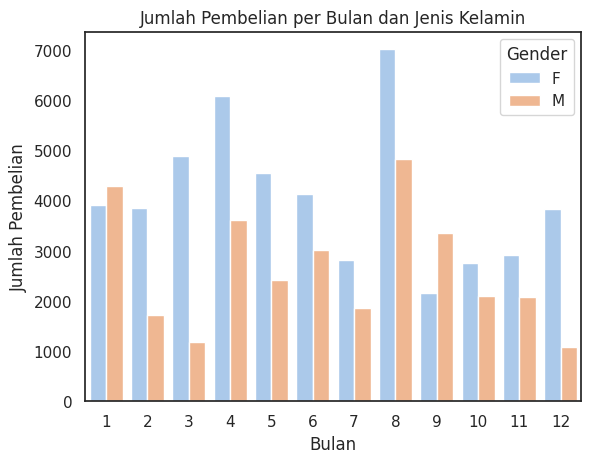

In [ ]:
jppg = data_filtered.groupby(['Gender', 'Month'])['Quantity'].sum().reset_index()

sb.barplot(x='Month', y='Quantity', hue='Gender', data=jppg, palette='pastel')
plt.title('Jumlah Pembelian per Bulan dan Jenis Kelamin')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.legend(title='Gender')
plt.show()


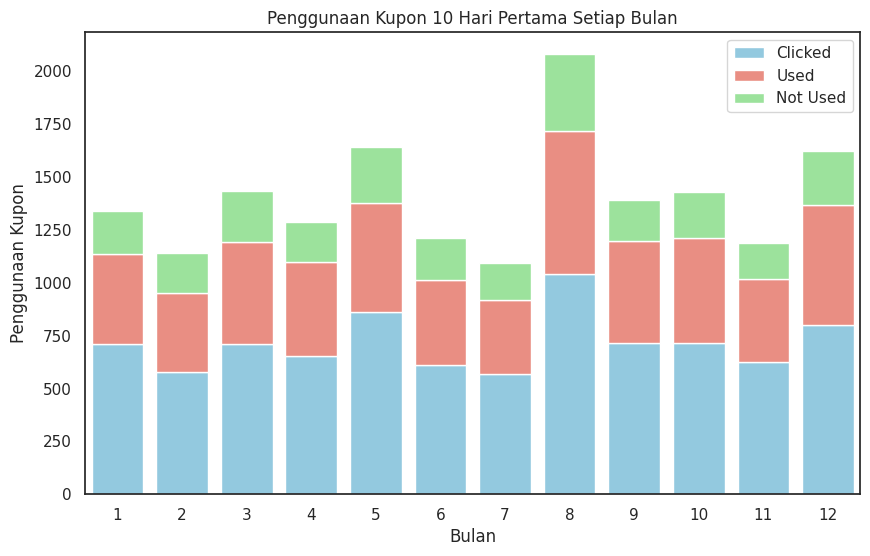

In [ ]:
# Menghitung jumlah penggunaan kupon berdasarkan status
coupon_usage = data_filtered.groupby(['Month', 'Coupon_Status']).size().unstack(fill_value=0)

# Membuat grafik
plt.figure(figsize=(10, 6))
sb.barplot(x=coupon_usage.index, y=coupon_usage['Clicked'], color='skyblue', label='Clicked')
sb.barplot(x=coupon_usage.index, y=coupon_usage['Used'], color='salmon', label='Used', bottom=coupon_usage['Clicked'])
sb.barplot(x=coupon_usage.index, y=coupon_usage['Not Used'], color='lightgreen', label='Not Used',
                bottom=coupon_usage['Used'] + coupon_usage['Clicked'])

plt.xlabel('Bulan')
plt.ylabel('Penggunaan Kupon')
plt.title('Penggunaan Kupon 10 Hari Pertama Setiap Bulan')

plt.show()

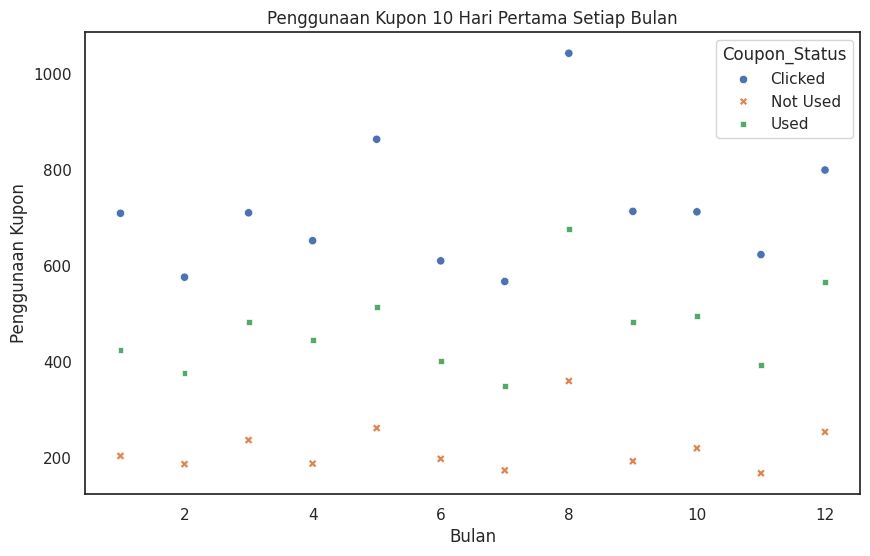

In [ ]:
coupon_usage = data_filtered.groupby(['Month', 'Coupon_Status']).size().unstack()

plt.figure(figsize=(10, 6))
sb.scatterplot(data=coupon_usage, marker='o')

plt.xlabel('Bulan')
plt.ylabel('Penggunaan Kupon')
plt.title('Penggunaan Kupon 10 Hari Pertama Setiap Bulan')

plt.show()

In [ ]:
# Create some example data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Melakukan K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error)

In [ ]:
# Mendapatkan hasil cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=mse_scorer)


In [ ]:
# Mencetak hasil cross-validation
print(f"Cross-Validation MSE scores: {cv_scores}")
print(f"Mean Cross-Validation MSE: {cv_scores.mean()}")
print(f"Standard Deviation of Cross-Validation MSE: {cv_scores.std()}")

Cross-Validation MSE scores: [0.77419801 0.97646011 0.89300955 1.54408278 1.25879503]
Mean Cross-Validation MSE: 1.0893090965014898
Standard Deviation of Cross-Validation MSE: 0.2778877436226016


In [ ]:
# Melatih model pada seluruh training set
model.fit(X_train, y_train)

# Melakukan prediksi pada test set
y_pred = model.predict(X_test)

# Evaluasi model pada test set
mse_test = mean_squared_error(y_test, y_pred)
r2_test = model.score(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse_test}")
print(f"R^2 Score on Test Set: {r2_test}")

Mean Squared Error on Test Set: 0.9177532469714291
R^2 Score on Test Set: 0.6521157503858556


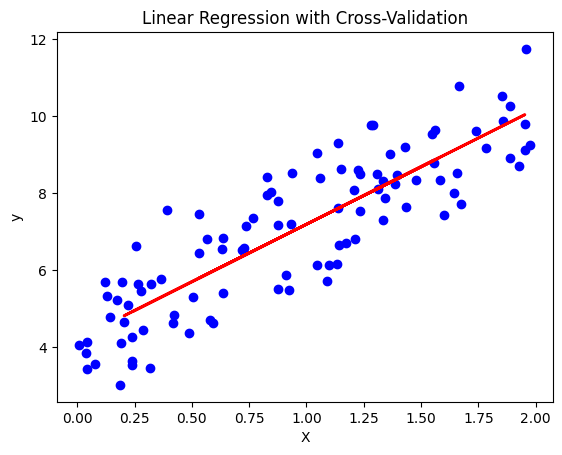

In [ ]:
# Visualisasi hasil
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Cross-Validation')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.9177532469714291
R^2 Score: 0.6521157503858556


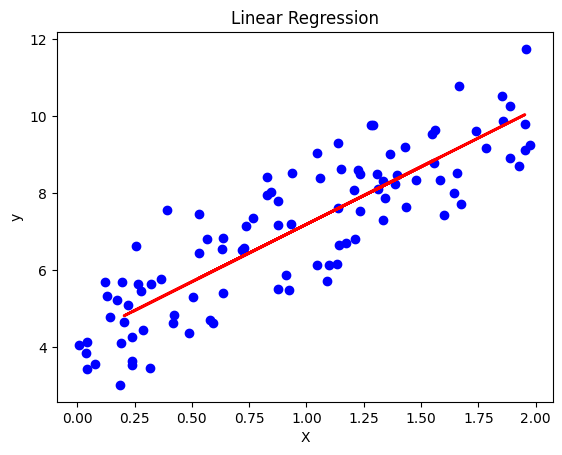

In [ ]:
# import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()


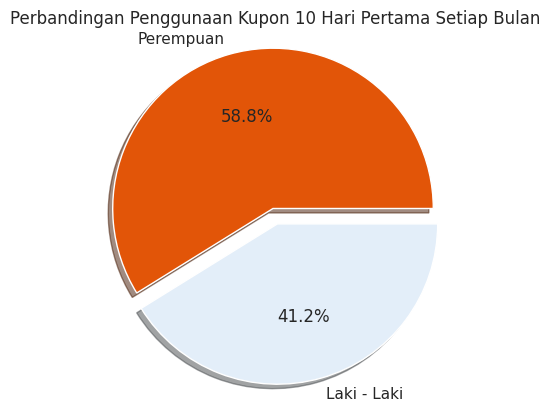

In [ ]:
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

# Filter the data for the first 10 days and 'Used' coupon status
data_coupon = data[(data['Transaction_Date'].dt.day <= 10) & (data['Coupon_Status'] == 'Used')]

# Get the gender value counts
val3 = data_coupon.Gender.value_counts()

# Define colors
c1 = plt.get_cmap('Blues')  # Example of using a colormap
c2 = plt.get_cmap('Oranges')  # Example of using a colormap

plt.pie(val3, labels=['Perempuan', 'Laki - Laki'], autopct="%1.1f%%", shadow=True,
        explode=(0.1, 0), colors=[c2(0.7), c1(0.1)])
plt.axis('equal')
plt.title('Perbandingan Penggunaan Kupon 10 Hari Pertama Setiap Bulan')

sb.set(style='white')
plt.show()


Text(0.5, 1.0, 'Frekuensi lokasi 10 Hari Pertama Setiap Bulan')

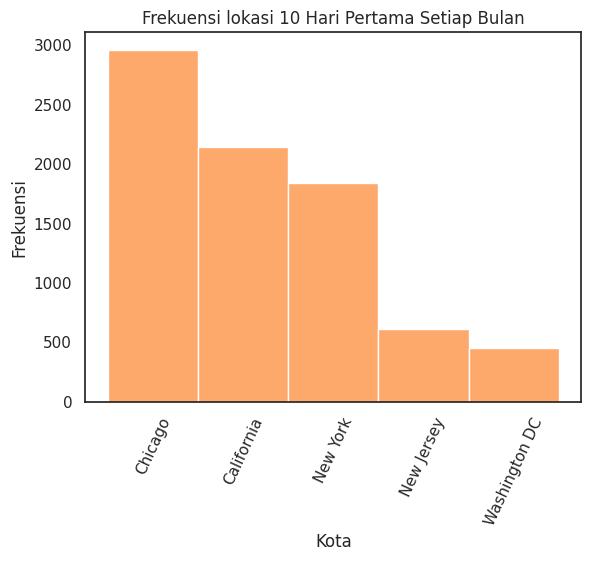

In [ ]:
sb.histplot(data_filtered.Location,color=c2(0.5))
plt.ylabel('Frekuensi')
plt.xlabel('Kota')
plt.xticks(rotation=65)
plt.title('Frekuensi lokasi 10 Hari Pertama Setiap Bulan')